# AutoSmart-Retention

Importamos librerias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. GENERACIÓN DE DATOS SINTÉTICOS (Simulando un DMS automotriz)

In [ ]:
data = {
    'id_cliente': range(n_clientes),
    'edad_vehiculo_años': np.random.randint(1, 10, n_clientes),
    'km_anuales_promedio': np.random.normal(15000, 5000, n_clientes),
    'servicios_realizados': np.random.randint(1, 15, n_clientes),
    'gasto_promedio_usd': np.random.normal(300, 100, n_clientes),
    'garantia_vigente': np.random.choice([0, 1], n_clientes),
    'quejas_abiertas': np.random.choice([0, 1, 2], n_clientes, p=[0.7, 0.2, 0.1])
}

df = pd.DataFrame(data)

# Crear la variable objetivo (Churn): Mayor probabilidad si no hay garantía y el auto es viejo
# 1 = El cliente ABANDONA el taller, 0 = El cliente SE QUEDA
df['churn'] = ((df['edad_vehiculo_años'] > 4) & (df['garantia_vigente'] == 0) & (np.random.rand(n_clientes) > 0.3)).astype(int)

#### 2. PROCESAMIENTO Y MODELADO

In [ ]:
X = df.drop(['id_cliente', 'churn'], axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### 3. EVALUACIÓN

In [ ]:
y_pred = model.predict(X_test)
print("--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       233
           1       0.71      0.93      0.81        67

    accuracy                           0.90       300
   macro avg       0.84      0.91      0.87       300
weighted avg       0.92      0.90      0.90       300



#### 4. VISUALIZACIÓN DE IMPORTANCIA DE VARIABLES

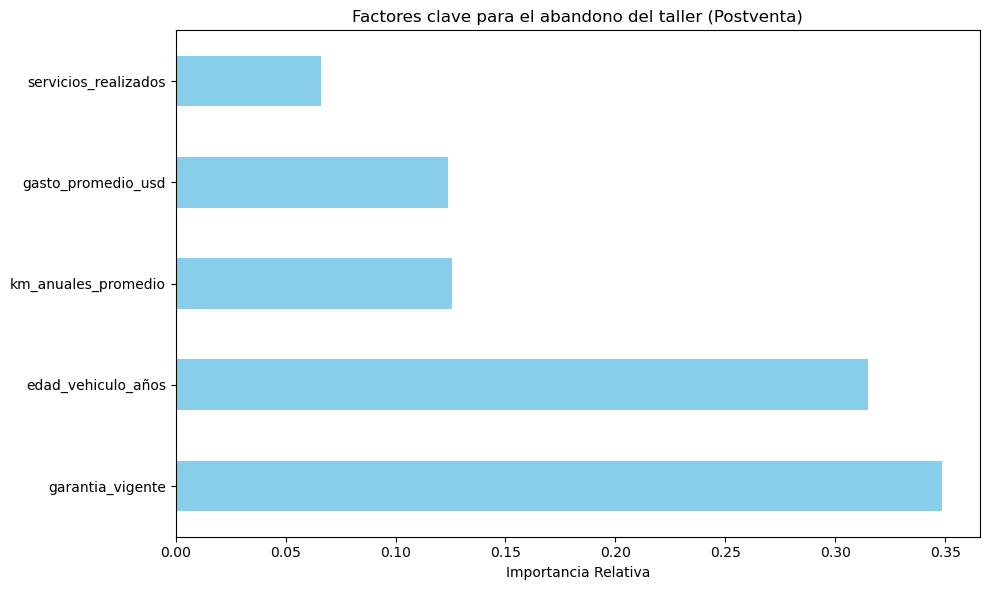

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
feature_importances.nlargest(5).plot(kind='barh', color='skyblue')
plt.title('Factores clave para el abandono del taller (Postventa)')
plt.xlabel('Importancia Relativa')
plt.tight_layout()
plt.savefig('importancia_variables.png') # Se guardará 
plt.show()

#### Guardar dataset para el repo

In [ ]:
df.to_csv('data_posventa.csv', index=False)